# Data Science Intern Project - Rezki Yulia Damayanti (July 2024)

---
## Exploratory Data Analysis (EDA) of Global Terrorism Incidents (1970-2017)

**Introduction**

The aim of this Exploratory Data Analysis (EDA) project is to gain actionable insights into the global landscape of terrorism from 1970 to 2017.  By leveraging the "Global Terrorism" dataset, I seek to identify key trends, patterns, and geographical hotspots of terrorist activity. This analysis is designed to assist security and defense analysts in understanding the evolving nature of terrorism, assessing risks, and informing strategic decision-making processes.

**Key Objectives**

1. **Hot Zone Identification:**  Determine the geographical regions most significantly impacted by terrorism, considering factors like frequency of attacks, severity, and types of targets.
2. **Security Issue Analysis:** Uncover the predominant security concerns arising from the data, such as prevalent attack types, most active terrorist groups, and common motivations behind attacks.
3. **Data-Driven Insights:** Extract valuable insights that can contribute to the development of more effective counter-terrorism strategies, resource allocation, and risk mitigation measures.

**Expected Outcomes**

This EDA is expected to yield a comprehensive overview of global terrorism trends over the specified timeframe. The findings will be presented through clear visualizations, summary statistics, and actionable recommendations. This analysis will serve as a valuable resource for security and defense professionals, policymakers, and researchers seeking to understand and address the complex challenges posed by terrorism.

**Disclaimer:**

This analysis is based on historical data and may not perfectly predict future events. The interpretations and conclusions drawn are subject to the limitations of the available dataset and the methodologies employed.

---

### Import Library and Data

In [ ]:
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/globalterrorismdb_0718dist.csv'
data = pd.read_csv(file_path,encoding="latin1")
data.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0        0         0        0       0      NaN  
1        0         1        1       1      NaN  
2       -9        -9        1       1      NaN  
3       -9        -9        1       1      NaN  
4       -9        -9        1       1      NaN  

[5 rows x 135 columns]

In [ ]:
data.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

Here's a point-by-point explanation of the key attributes:

1. **Core Incident Information:**
   - `eventid`: Unique identifier, essential for tracking individual events.
   - `iyear`, `imonth`, `iday`: Exact date of the incident, crucial for time-series analysis and understanding trends over time.
   - `approxdate`: Provides an estimated date if the exact date is unknown, still useful for broader temporal analysis.
   - `extended`: Indicates if the incident was part of a larger campaign, valuable for identifying coordinated attacks.
   - `resolution`: Date of resolution, helpful for assessing the duration and impact of incidents.
   - `country`, `country_txt`: Country where the incident occurred, fundamental for geographical analysis and comparisons.
   - `region`, `region_txt`: Broader region (e.g., Middle East, South Asia), useful for understanding regional patterns.
   - `provstate`, `city`, `latitude`, `longitude`: Provide increasingly specific location details, enabling precise geospatial analysis.
   - `summary`: A brief description of the event, offering context for qualitative analysis.

2. **Terrorism Classification:**
   - `crit1`, `crit2`, `crit3`: Criteria used to classify events as terrorism, important for understanding the dataset's definition of terrorism.
   - `doubtterr`: Degree of uncertainty about whether the event is terrorism, allows for nuanced analysis of borderline cases.
   - `alternative`, `alternative_txt`: If the event is not classified as terrorism, these fields provide alternative classifications (e.g., political violence).

3. **Target Information:**
   - `targtype1`, `targtype1_txt`: The primary target type (e.g., government, business, civilians), essential for understanding who is being targeted.
   - `targsubtype1`, `targsubtype1_txt`: More specific subtype of the target (e.g., embassy, police station, religious figures), providing deeper insights.
   - `corp1`, `target1`: Name of the specific organization or individual targeted, useful for identifying patterns in victim selection.
   - `natlty1`, `natlty1_txt`: Nationality of the primary target, relevant for understanding the international dimensions of terrorism.

4. **Perpetrator Information:**
   - `gname`: Name of the perpetrator group, crucial for identifying active groups and their patterns of behavior.
   - `gsubname`: Subgroup within the larger perpetrator group, allows for more granular analysis of group structures.
   - `motive`: Stated or inferred motive behind the attack, valuable for understanding the underlying causes of terrorism.

5. **Additional Details:**
   - `weaptype1`, `weaptype1_txt`, `weapsubtype1`, `weapsubtype1_txt`: Details about the weapons used, important for understanding the tactics and capabilities of terrorist groups.
   - `nkill`, `nwound`: Number of people killed and wounded, critical for assessing the impact and severity of attacks.
   - `property`, `propextent`, `propvalue`: Information about property damage, relevant for understanding the economic consequences of terrorism.

---


### Data Preparation

Renaming columns to be more concise, intuitive, and descriptive is considered a best practice in data analyst. It improves the readability of my code and analysis, making it easier for me and my colleagues to understand and work with the data.

By choosing clear and meaningful names, I enhance the overall quality of my project documentation and make it more accessible to a broader audience.

In [ ]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                       'nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                       'weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

Selecting a subset of columns is a common and effective way to streamline my analysis and focus on the most relevant information. The choice of columns will depend on my specific research questions and goals. By carefully selecting the right columns, I can maximize the efficiency and effectiveness of your EDA.

In [ ]:
data = data[['Year','Month','Day','Country','state','Region','city','latitude','longitude','AttackType','Killed',
               'Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Country      181691 non-null  object 
 4   state        181270 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181256 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181053 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  Motive       50561 non-null   object 
dtypes: float64(4), int64(3),

In [ ]:
data.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
state             421
Region              0
city              435
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            638
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

The output shows the number of missing values for each column in your dataset:

* `'Year'`, `'Month'`, `'Day'`, `'Country'`, `'Region'`, `'AttackType'`, `'Target_type'`, `'Weapon_type'`, `'Group'`: These columns have no missing values, which is good news as they are likely crucial for my analysis.

* `'state'`: 421 missing values.

* `'city'`: 435 missing values.

* `'latitude'`, `'longitude'`: These columns have a significant number of missing values (4556 and 4557, respectively). This could be problematic for geospatial analysis. I'll need to decide how to handle these missing values later.

* `'Killed'`, `'Wounded'`: These columns have a substantial number of missing values (10313 and 16311, respectively). This means there are many attacks where the number of casualties is unknown.

* `'Target'`: 638 missing values. This indicates that for some attacks, the specific target is not identified.

* `'Summary'`: A large number of missing values (66129). This is not surprising, as summaries might not be available for all recorded incidents.

* `'Motive'`: The vast majority of values are missing (131130). This is a significant limitation, as understanding the motives behind attacks is crucial for analysis.

> **Next Steps**

Given these findings, I'll need to make decisions about how to handle the missing data.
* **Keep as is**: For some analyses, it might be acceptable to keep the missing values as they are, especially if I have enough data to still draw meaningful conclusions.
---

### Data Analysis and Data Visualization

In [ ]:
print("Country with the most attacks:",data['Country'].value_counts().idxmax())
print("City with the most attacks:",data['city'].value_counts().index[1])
print("Region with the most attacks:",data['Region'].value_counts().idxmax())
print("Year with the most attacks:",data['Year'].value_counts().idxmax())
print("Month with the most attacks:",data['Month'].value_counts().idxmax())
print("Group with the most attacks:",data['Group'].value_counts().index[1])
print("Most Attack Types:",data['AttackType'].value_counts().idxmax())

Country with the most attacks: Iraq
City with the most attacks: Baghdad
Region with the most attacks: Middle East & North Africa
Year with the most attacks: 2014
Month with the most attacks: 5
Group with the most attacks: Taliban
Most Attack Types: Bombing/Explosion


* Country with the most attacks: Iraq has
experienced the highest number of terrorist attacks during this period. This could be attributed to various factors such as political instability, sectarian conflicts, and the presence of extremist groups.

* City with the most attacks: Baghdad, the capital of Iraq, emerges as the city most frequently targeted by terrorists. This finding aligns with the previous observation about Iraq being the country with the most attacks.

* Region with the most attacks: The Middle East & North Africa region is identified as the most affected by terrorism. This region has been plagued by historical conflicts, political tensions, and the rise of various extremist ideologies.

* Year with the most attacks: The year 2014 witnessed the highest number of terrorist attacks globally. This could be linked to the rise of ISIS and its territorial expansion in Iraq and Syria during that period.

* Month with the most attacks: May is the month with the highest frequency of attacks. While this observation might seem surprising, it could be due to seasonal factors influencing the operational capabilities of certain terrorist groups.

* Group with the most attacks: The Taliban is identified as the most active terrorist group in terms of the number of attacks. This group has been a significant force in Afghanistan and neighboring regions, waging an insurgency against governments and international forces.

* Most Attack Types: Bombing/Explosion is the most common attack type employed by terrorists. This method allows for inflicting mass casualties and generating widespread fear, making it a favored tactic among various groups.



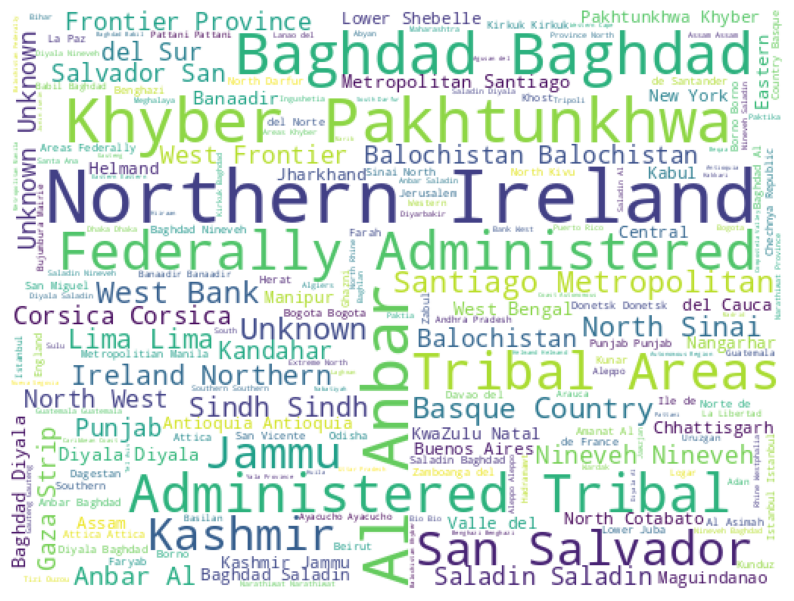

In [ ]:
from wordcloud import WordCloud
from scipy import signal
cities = data.state.dropna()
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color = 'white',
                     width = 512,
                     height = 384).generate(' '.join(cities))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

The most prominent words (and thus the most frequent states) in the word cloud include Baghdad, Northern Ireland, Khyber, Pakhtunkhwa, etc. This suggests that these regions have been disproportionately affected by terrorism during the period covered by dataset.

> Number of Terrorist Activities each Year

In [ ]:
data['Year'].value_counts(dropna = False).sort_index()

Year
1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: count, dtype: int64

In [ ]:
import pandas as pd
import altair as alt

data2 = pd.DataFrame({'Year': [1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
                     'count': [651, 471, 568, 473, 581, 740, 923, 1319, 1526, 2662, 2662, 2586, 2544, 2870, 3495, 2915, 2860, 3183, 3721, 4324, 3887, 4683, 5071, 3456, 3081, 3058, 3197, 934, 1395, 1814, 1906, 1333, 1278, 1166, 2017, 2758, 3242, 4805, 4721, 4826, 5076, 8522, 12036, 16903, 14965, 13587, 10900]})

chart = alt.Chart(data2).mark_line().encode(
    x=alt.X('Year:O', axis=alt.Axis(title='Year')),
    y=alt.Y('count:Q', axis=alt.Axis(title='Number of Terrorist Attacks')),
    tooltip=['Year', 'count']
).properties(
    title='Number of Terrorist Attacks by Year (1970-2017)'
).interactive()

chart

alt.Chart(...)

The output provides a year-by-year count of terrorist attacks from 1970 to 2017. Several key observations emerge from this data:

* Significant Increase in Attacks: There is a pronounced upward trend in the number of terrorist attacks from 1970 to 2014, indicating a substantial escalation of global terrorist activity during this period.

* Peak in 2014: The year 2014 stands out as the peak year for terrorist attacks, with over 16,900 incidents recorded. This surge is likely attributable to the rise of ISIS and its territorial expansion in Iraq and Syria during that time.

* Decline After 2014: Following 2014, there is a noticeable decline in the frequency of attacks. However, the number of incidents remains elevated, underscoring the persistent threat of terrorism on a global scale.

* Missing Data for 1993: Notably, there is no data available for the year 1993. This gap should be considered when interpreting the overall trends, as it could potentially obscure significant events that occurred during that year.

> Terrorist Activities by Region in Each Year through Area Plot

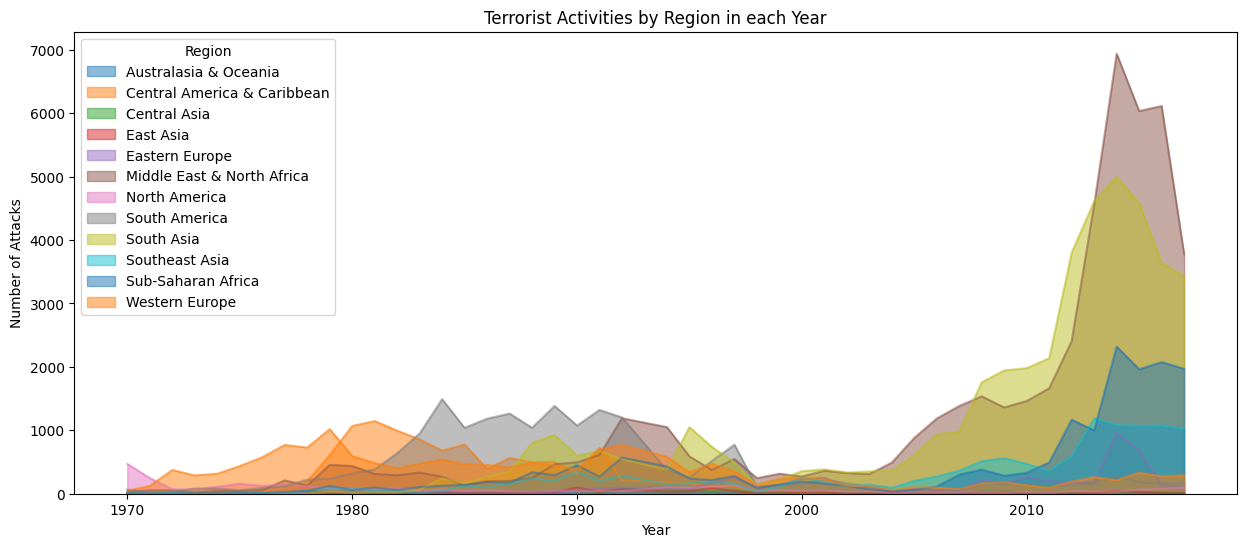

In [ ]:
pd.crosstab(data.Year, data.Region).plot(kind='area',stacked = False, figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

* Early Period (1970-1990):
Terrorist activities were relatively low across all regions.
Western Europe and Central America & Caribbean show noticeable activity compared to other regions during this period.

* 1990s to Early 2000s:
There is a gradual increase in terrorist activities.
South Asia and the Middle East & North Africa regions begin to show a significant rise in activities.
* Post-2000s:
A sharp increase in terrorist activities is evident, peaking around 2014.
The Middle East & North Africa region experiences the most substantial rise in terrorist attacks, followed by South Asia.
Sub-Saharan Africa also shows a marked increase in this period.
Recent Trends:

* Post-2014, there's a slight decline in overall terrorist activities, but they remain significantly higher compared to the pre-2000 period.
The Middle East & North Africa continues to dominate in terms of the number of attacks.

> Top Countries affected by Terror Attacks

In [ ]:
data.Country.value_counts()[:15]

Country
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: count, dtype: int64

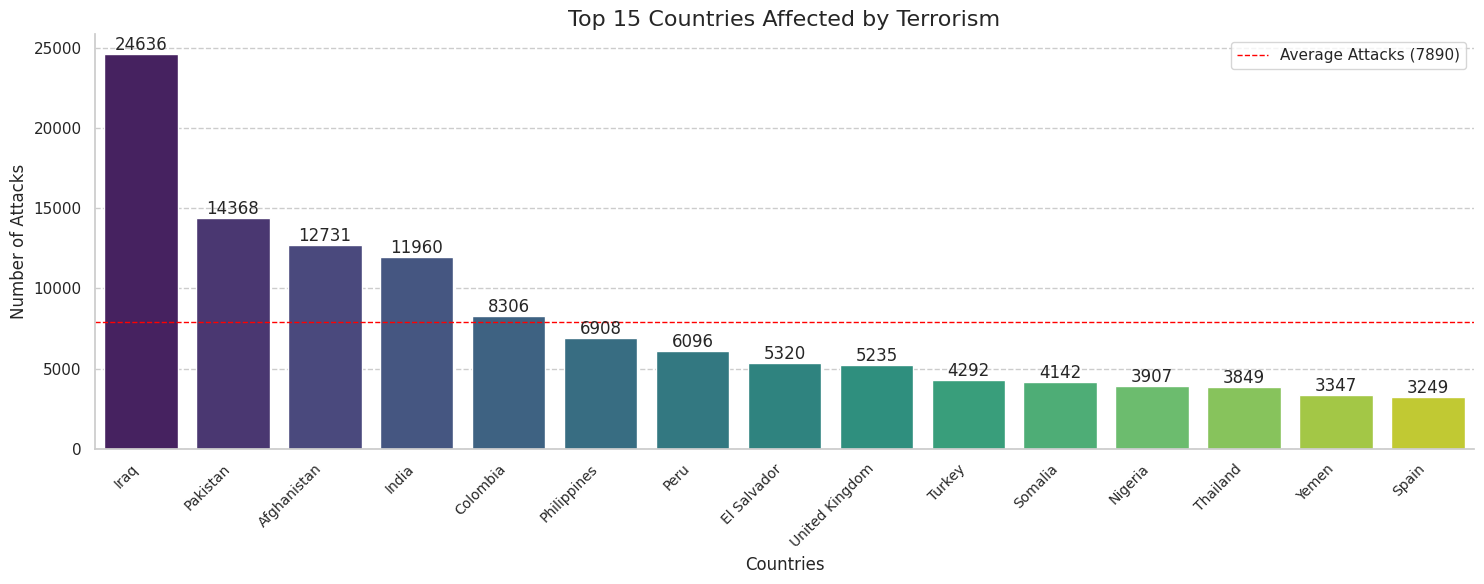

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
plt.figure(figsize=(15, 6))
colors = sns.color_palette("viridis", 15)
ax = sns.barplot(
    x=data['Country'].value_counts()[:15].index,
    y=data['Country'].value_counts()[:15].values,
    palette=colors
)
for bar, label in zip(ax.patches, data['Country'].value_counts()[:15].values):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, label,
            ha='center', va='bottom')
plt.title('Top 15 Countries Affected by Terrorism', fontsize=16)
plt.xlabel('Countries', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
ax.grid(axis='y', linestyle='--')
sns.despine(top=True, right=True)
avg_attacks = data['Country'].value_counts()[:15].mean()
plt.axhline(avg_attacks, color='red', linestyle='dashed', linewidth=1, label=f'Average Attacks ({avg_attacks:.0f})')
plt.legend()

plt.tight_layout()
plt.show()


* Disproportionate Impact:  Iraq and Pakistan stand out with significantly higher numbers of attacks compared to other nations. Iraq experienced over 24,000 attacks, while Pakistan suffered nearly 15,000. This highlights these countries as major hotspots for terrorism during this period.

* Regional Clusters:  The data reveals regional concentrations of terrorism. South Asia (Pakistan, Afghanistan, India) and the Middle East (Iraq) are particularly affected. Latin America (Colombia, Peru, El Salvador) also shows a notable presence, suggesting the global nature of the issue.

* Variation in Intensity: While the top three countries (Iraq, Pakistan, Afghanistan) experienced a high volume of attacks, the number drops significantly for the remaining countries. This suggests a tiered impact, with some nations facing chronic, intense terrorism, while others experience it less frequently.

* Average as a Benchmark: The red dashed line indicates the average number of attacks across these top 15 countries (approximately 7,890).  This benchmark helps contextualize the data, showing which countries exceed or fall below the average level of terrorist activity.
---

### Analysis On Customized Data

> Terrorist Attacks of a Particular year and their Locations

In [ ]:
import folium
from folium.plugins import MarkerCluster
filterYear = data['Year'] == 1980

In [ ]:
import folium
import folium.plugins

filtered_data = data[filterYear]
locations = filtered_data[['city', 'latitude', 'longitude']].dropna()
map_center = [0, 30]
map = folium.Map(
    location=map_center,
    tiles='CartoDB positron',
    zoom_start=2,
    control_scale=True
)
marker_cluster = folium.plugins.MarkerCluster().add_to(map)
for index, row in locations.iterrows():
    city = row['city']
    latitude = row['latitude']
    longitude = row['longitude']
    popup_html = f"<b>City:</b> {city}<br>"
    if 'Killed' in filtered_data.columns and 'Wounded' in filtered_data.columns:
        popup_html += f"<b>Killed:</b> {filtered_data.loc[index, 'Killed']}<br>"
        popup_html += f"<b>Wounded:</b> {filtered_data.loc[index, 'Wounded']}<br>"

    popup = folium.Popup(popup_html, max_width=200)
    folium.Marker([latitude, longitude], popup=popup).add_to(marker_cluster)
map

The provided data reveals significant trends in international terrorism during the 1968-1980 period:

* Regional Distribution: A noteworthy pattern emerges regarding the geographical distribution of incidents. Latin America and the Middle East each accounted for approximately 20% of recorded international terrorist activities. This suggests these regions were major hubs for such incidents during this timeframe.

* Proportion of Lethal Incidents:  While a majority of international terrorist incidents did not result in casualties, a significant proportion involved deaths or injuries. Between 1968 and 1979, 11% of incidents resulted in fatalities, and 15% caused injuries. Notably, there was a slight increase in these proportions in 1980, indicating a potential escalation in the lethality of terrorist attacks.

To delve deeper into the analysis, it's crucial to identify the specific terrorist organizations responsible for these incidents in each country. By performing a value count, we can determine which organizations have been the most active. For clarity and precision, we exclude the category of 'Unknown' perpetrators, starting our indexing from 1.

In [ ]:
data.Group.value_counts()[1:15]

Group
Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Kurdistan Workers' Party (PKK)                      2310
Basque Fatherland and Freedom (ETA)                 2024
Communist Party of India - Maoist (CPI-Maoist)      1878
Maoists                                             1630
Liberation Tigers of Tamil Eelam (LTTE)             1606
Name: count, dtype: int64

In [ ]:
test = data[data.Group.isin(['Shining Path (SL)','Taliban','Islamic State of Iraq and the Levant (ISIL)'])]

In [ ]:
test.Country.unique()

array(['Peru', 'Bolivia', 'Colombia', 'Argentina', 'Brazil', 'Mexico',
       'Afghanistan', 'Pakistan', 'Syria', 'Iraq', 'Turkey', 'Tunisia',
       'Lebanon', 'Turkmenistan', 'Israel', 'Belgium', 'Egypt', 'Libya',
       'Saudi Arabia', 'West Bank and Gaza Strip', 'France', 'Bahrain',
       'Jordan', 'Somalia', 'Germany', 'Yemen', 'Philippines', 'Malaysia',
       'Indonesia', 'Russia', 'Georgia', 'United Kingdom', 'Iran',
       'Australia'], dtype=object)

In [ ]:
data_df_group = data.dropna(subset=['latitude','longitude'])
data_df_group = data_df_group.drop_duplicates(subset=['Country','Group'])
terrorist_groups = data.Group.value_counts()[1:8].index.tolist()
data_df_group = data_df_group.loc[data_df_group.Group.isin(terrorist_groups)]
print(data_df_group.Group.unique())

["New People's Army (NPA)" 'Irish Republican Army (IRA)'
 'Shining Path (SL)' 'Farabundo Marti National Liberation Front (FMLN)'
 'Taliban' 'Al-Shabaab' 'Islamic State of Iraq and the Levant (ISIL)']


In [ ]:
locations = data_df_group[['latitude', 'longitude', 'Group', 'Country']].values.tolist()
map_center = [20, 0]
m1 = folium.Map(
    location=map_center,
    tiles='CartoDB positron',
    zoom_start=2,
    control_scale=True
)
marker_cluster = MarkerCluster(name='Terrorist Groups', control=True,  icon_create_function=None)
def create_popup(row):
    return folium.Popup(
        f"""
        <b>Group:</b> {row[2]}<br>
        <b>Country:</b> {row[3]}<br>
        """
    )
for lat, lng, group, country in locations:
    folium.Marker(
        location=[lat, lng],
        popup=create_popup([lat, lng, group, country]),
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(marker_cluster)

marker_cluster.add_to(m1)
folium.TileLayer('openstreetmap').add_to(m1)
folium.TileLayer('stamentoner').add_to(m1)
folium.TileLayer('stamenwatercolor').add_to(m1)
folium.TileLayer('cartodbdark_matter').add_to(m1)
folium.LayerControl().add_to(m1)
m1


The map visualizes the global distribution of terrorist organizations responsible for incidents across various countries. Europe stands out as a major hub, with 27 distinct groups identified, suggesting a complex landscape of motivations and strategies. North America follows with 11 organizations, indicating a significant presence, while the Middle East and Africa each have 8. Asia has 4, and South America and Australia have 1 each. This distribution underscores the global reach of terrorism, with concentrations in specific regions. The high concentration in Europe may be attributed to historical conflicts, political instability, or socio-economic disparities. The presence of organizations across continents suggests transnational networks facilitating the spread of ideologies and resources.


In [ ]:
data.head()

Year  Month  Day             Country    state                       Region  \
0  1970      7    2  Dominican Republic      NaN  Central America & Caribbean   
1  1970      0    0              Mexico  Federal                North America   
2  1970      1    0         Philippines   Tarlac               Southeast Asia   
3  1970      1    0              Greece   Attica               Western Europe   
4  1970      1    0               Japan  Fukouka                    East Asia   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  Wounded                   Target Summary  \
0     1.0      0.0             Julio Guzman     NaN   
1     0.0      0.0  Nadine Chaval, daughter     NaN   
2     1.0      0.0                 Employee     NaN   
3     NaN      NaN             U.S. Embassy     NaN   
4     NaN      NaN           U.S. Consulate     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

  Weapon_type Motive  
0     Unknown    NaN  
1     Unknown    NaN  
2     Unknown    NaN  
3  Explosives    NaN  
4  Incendiary    NaN

In [ ]:
killData = data.loc[:,'Killed']
print('Number of people killed by terror attack:', int(sum(killData.dropna())))

Number of people killed by terror attack: 411868


In [ ]:
attackData = data.loc[:,'AttackType']
typeKillData = pd.concat([attackData, killData], axis=1)

In [ ]:
typeKillFormatData = typeKillData.pivot_table(columns='AttackType', values='Killed', aggfunc='sum')
typeKillFormatData

AttackType  Armed Assault  Assassination  Bombing/Explosion  \
Killed           160297.0        24920.0           157321.0   

AttackType  Facility/Infrastructure Attack  Hijacking  \
Killed                              3642.0     3718.0   

AttackType  Hostage Taking (Barricade Incident)  Hostage Taking (Kidnapping)  \
Killed                                   4478.0                      24231.0   

AttackType  Unarmed Assault  Unknown  
Killed                880.0  32381.0

In [ ]:
typeKillFormatData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, Killed to Killed
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Armed Assault                        1 non-null      float64
 1   Assassination                        1 non-null      float64
 2   Bombing/Explosion                    1 non-null      float64
 3   Facility/Infrastructure Attack       1 non-null      float64
 4   Hijacking                            1 non-null      float64
 5   Hostage Taking (Barricade Incident)  1 non-null      float64
 6   Hostage Taking (Kidnapping)          1 non-null      float64
 7   Unarmed Assault                      1 non-null      float64
 8   Unknown                              1 non-null      float64
dtypes: float64(9)
memory usage: 80.0+ bytes


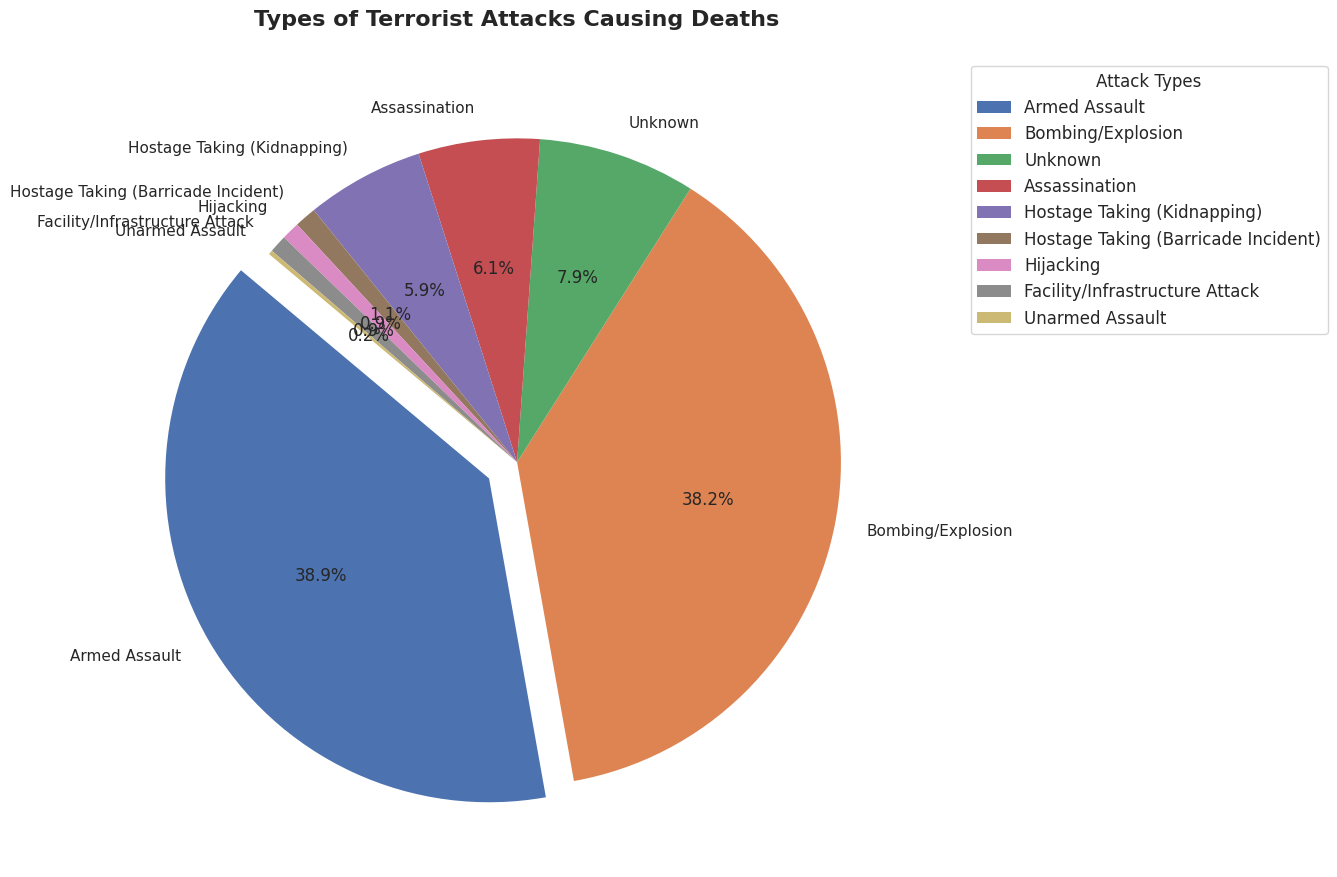

In [ ]:
labels = typeKillFormatData.columns.tolist()
transpoze = typeKillFormatData.T
values = transpoze.values.flatten().tolist()

sorted_indices = np.argsort(values)[::-1]
labels = [labels[i] for i in sorted_indices]
values = [values[i] for i in sorted_indices]


colors = sns.color_palette('deep')
explode = [0.1 if i == 0 else 0 for i in range(len(labels))]
plt.figure(figsize=(12, 10))
plt.pie(values, labels=labels, colors=colors, startangle=140, autopct='%1.1f%%', explode=explode, shadow=False, wedgeprops={'linewidth': 0, 'edgecolor': 'white'})
plt.title('Types of Terrorist Attacks Causing Deaths\n', fontsize=16, fontweight='bold')
plt.legend(labels, loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12, title="Attack Types")
plt.ylabel('')
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()


* **Armed Assault (38.9%)**: This category represents attacks involving the use of firearms, such as shootings or ambushes. It is the most lethal type, accounting for the highest percentage of fatalities.

*  **Bombing/Explosion (38.2%)**: These attacks involve explosives, including suicide bombings and bombings of public places. The close percentage to armed assault highlights their significant impact on casualties.

*  **Unknown (7.9%)**: This category includes incidents where the attack type remains unidentified. While relatively small, it underscores the need for better data collection and analysis.

*  **Hostage Taking (Kidnapping) (6.1%)**: These attacks involve abducting individuals for ransom or political purposes. Although less common, they can lead to fatalities.

*  **Facility/Infrastructure Attack (2.8%)**: These target critical infrastructure like power plants or transportation hubs. While infrequent, they can cause substantial harm.

*  **Hijacking (<1%)**: Extremely rare, hijackings result in minimal deaths.




In [ ]:
countryData = data.loc[:,'Country']
countryKillData = pd.concat([countryData, killData], axis=1)

In [ ]:
countryKillFormatData = countryKillData.pivot_table(columns='Country', values='Killed', aggfunc='sum')
countryKillFormatData

Country  Afghanistan  Albania  Algeria  Andorra  Angola  Antigua and Barbuda  \
Killed       39384.0     42.0  11066.0      0.0  3043.0                  0.0   

Country  Argentina  Armenia  Australia  Austria  ...  Vietnam  \
Killed       490.0     37.0       23.0     30.0  ...      1.0   

Country  Wallis and Futuna  West Bank and Gaza Strip  West Germany (FRG)  \
Killed                 0.0                    1500.0                97.0   

Country  Western Sahara   Yemen  Yugoslavia  Zaire  Zambia  Zimbabwe  
Killed              1.0  8776.0       119.0  324.0    70.0     154.0  

[1 rows x 205 columns]

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=25
fig_size[1]=25
plt.rcParams["figure.figsize"] = fig_size

In [ ]:
import plotly.graph_objects as go
import plotly.io as pio

sorted_data = countryKillFormatData.loc[:, countryKillFormatData.iloc[0].sort_values(ascending=False).index]
top_5_countries = sorted_data.columns[:5]
top_5_values = sorted_data.iloc[0][:5].values.tolist()
top_5_df = pd.DataFrame({'Country': top_5_countries, 'Killed People': top_5_values})

colors = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']
average_killed = top_5_df['Killed People'].mean()
fig = go.Figure()
fig.add_trace(go.Bar(
    x=top_5_df['Country'],
    y=top_5_df['Killed People'],
    marker_color=colors,
    text=top_5_df['Killed People'],
    textposition='outside',
    hovertemplate='<b>%{x}</b><br>Killed People: %{y:,.0f}<extra></extra>',
))
fig.add_hline(
    y=average_killed,
    line_width=2,
    line_dash="dash",
    line_color="red",
    annotation_text=f"Average: {average_killed:,.0f}",
    annotation_position="top right",
    annotation=dict(
        bgcolor="white",
        bordercolor="grey",
        borderwidth=1,
        showarrow=False,
        xshift=-10,
        yshift=150,
        text=f"Average: {average_killed:,.0f}",
        font=dict(color="black")
    ),
)
fig.update_layout(
    title='Top 5 Countries with the Highest Number of Killed People',
    xaxis_title='Country',
    yaxis_title='Number of Killed People',
    font=dict(family="Arial, sans-serif"),
    plot_bgcolor='#f0f0f0',
    xaxis={'tickangle': 45, 'tickfont': dict(size=12)},
    yaxis={'gridcolor': '#e0e0e0', 'zerolinecolor': '#c0c0c0'},
    hovermode='x unified',
    showlegend=False,
)
fig.show()

Iraq leads with the highest number of casualties, reaching 78,589. It is followed by Afghanistan with 39,384 killed people. Pakistan, Nigeria, and India follow with decreasing numbers of 23,822, 22,682, and 19,341 respectively.

The red dashed line indicates the average number of killed people across these five countries, which is 36,764. This average provides a benchmark for comparison, highlighting that Iraq's number is more than double the average, while the other four countries fall below the average.